In [1]:
# your import statements
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# function that outputs matrix for a given value of N
def get_matrix(N,bc='Neumann'):
    a=np.zeros((N+1,N+1))
    for i in range(0,N+1):
        for j in range(0,N+1):
            if (i==j):
                a[i,j]=-2
            if (i-j==1):
                a[i,j]=1
            if (j-i==1):
                a[i,j]=1
    if bc == 'Neumann':
        a[0,1]= 2
        a[N,N-1]= 2
    if bc == 'Dirichlet':
        a[0,1]= 0
        a[N,N-1]= 0
        a[0,0]= 1
        a[N,N]= 1
    return a

print("Example of matrix A1 for N=5:\n",get_matrix(5))


Example of matrix A1 for N=5:
 [[-2.  2.  0.  0.  0.  0.]
 [ 1. -2.  1.  0.  0.  0.]
 [ 0.  1. -2.  1.  0.  0.]
 [ 0.  0.  1. -2.  1.  0.]
 [ 0.  0.  0.  1. -2.  1.]
 [ 0.  0.  0.  0.  2. -2.]]


In [3]:
# Defining parameters
def solve_smoke(sources,N,L,bc='Neumann',y=1.0/3600.0,source_coef=0.005):
    k = 0.05
    scalar_factor = L**2/(k*N**2)

    f = lambda x: -scalar_factor*source_coef if x in sources else 0
    a = np.array([f(i) for i in range(N+1)])

    M = get_matrix(N,bc)
    I = np.identity(N+1)
    matrix = M - y*scalar_factor*I
    try:
        inv_matrix = np.linalg.inv(matrix)
        s = np.dot(inv_matrix, a)
    except:
        print("no inverse")
        s = []
    return s, matrix

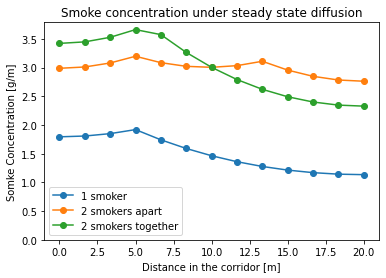

In [15]:
N = 12; L = 20.0;
x = np.array([i*L/N for i in range(N+1)])
sources1 = [3]
sources2 = [3,8]
sources3 = [3,4]

s1,_ = solve_smoke(sources1,N,L)
s2,_ = solve_smoke(sources2,N,L)
s3,_ = solve_smoke(sources3,N,L)

plt.plot(x,s1,marker='o',label="1 smoker")
plt.plot(x,s2,marker='o',label="2 smokers apart")
plt.plot(x,s3,marker='o',label="2 smokers together")
plt.legend()
plt.xlabel('Distance in the corridor [m]')
plt.ylabel('Somke Concentration [g/m]')
plt.title("Smoke concentration under steady state diffusion")
plt.ylim([0,None])
plt.show()

In [16]:
for N in [5,10,15]:
    _,m = solve_smoke(sources1,N,L)
    print(np.linalg.cond(m))

48.63553830772901
187.1414847772837
416.12367134720785


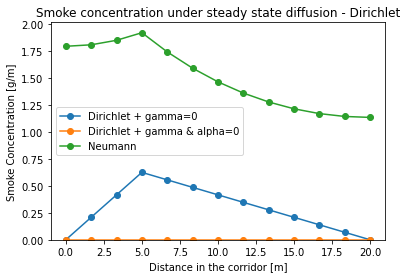

In [18]:
bc = 'Dirichlet' # 'Dirichlet', 'Neumann'
alpha = 0
gamma = 0
sa,ma = solve_smoke(sources1,12,L,bc,gamma)
sb,mb = solve_smoke(sources1,12,L,bc,gamma,alpha)
sc,mc = solve_smoke(sources1,12,L,'Neumann',1.0/3600.0,0.005)


plt.plot(x,sa,marker='o',label="Dirichlet + gamma=0")
plt.plot(x,sb,marker='o',label="Dirichlet + gamma & alpha=0")
plt.plot(x,sc,marker='o',label="Neumann")
plt.legend()
plt.xlabel('Distance in the corridor [m]')
plt.ylabel('Smoke Concentration [g/m]')
plt.title(f"Smoke concentration under steady state diffusion - {bc}")
plt.ylim([0,None])
plt.show()